# Implementing and Comparing ODE Methods

In [18]:
import numpy as np
import matplotlib.pyplot as plt 

First let's consider an example initial value problem

In [19]:
# The dynamics function to test the ODE methods on
def Dynamics(t, y):
    return -(y**2)*np.cos(2*t)

# The closed-form solution to the above IVP given y(0) = 1
def ExactVal(t):
    return (2/(np.sin(2*t)+2))

Now let's implement the Forward Euler method for solving ordinary differential equations numerically

In [20]:
# Takes the initial time, final time, number of time steps N, and 
#   the initial value y_init, and returns the computed approximate 
#   solution of the Dynamics function at each time step using the
#   Forward Euler scheme
def ForwardEuler(t_init, t_final, N, y_init):
    estimated_points = [y_init]
    h = (t_final - t_init) / N # time-step size
    y_cur = y_init
    t_cur = t_init
    for i in range(N):
        y_cur = y_cur + h * Dynamics(t_cur, y_cur)
        estimated_points.append(y_cur)
        t_cur += h
    return estimated_points
    

Let's test Forward Euler between times 0 and 5 with 20 and 40 time-steps.

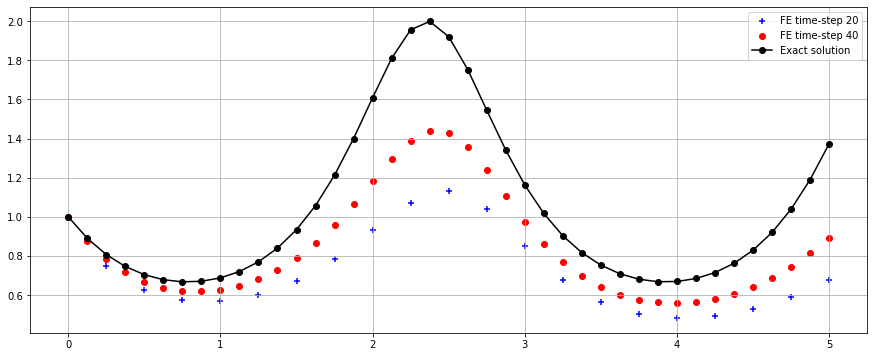

In [21]:
t_init = 0
t_final = 5
y_init = 1
N_1 = 20
N_2 = 40
step_1 = (t_final - t_init)/N_1 
step_2 = (t_final - t_init)/N_2

x_1 = [t_init + i * step_1 for i in range(N_1 + 1)]
x_2 = [t_init + i * step_2 for i in range(N_2 + 1)]
y_1 = ForwardEuler(t_init, t_final, N_1, y_init)
y_2 = ForwardEuler(t_init, t_final, N_2, y_init)
y_exact = [ExactVal(x) for x in x_2]

plt.figure(figsize=(15, 6))
plt.scatter(x_1, y_1, color='blue', marker='+', label='FE time-step 20')
plt.scatter(x_2, y_2, color='red', marker='o', label='FE time-step 40')
plt.plot(x_2, y_exact, color='black', linestyle='-', marker='o', label='Exact solution')
plt.grid(True)
plt.legend()
plt.show()

Let's implement the Runge-Kutta scheme

In [22]:
# Takes the initial time, final time, number of time steps N, and 
#   the initial value y_init, and returns the computed approximate 
#   solution of the Dynamics function at each time step using the
#   RK2 scheme
def RK2(t_init, t_final, N, y_init):
    estimated_points = [y_init]
    h = (t_final - t_init) / N
    y_cur = y_init
    t_cur = t_init
    for i in range(N):
        k_1 = Dynamics(t_cur, y_cur)
        k_2 = Dynamics(t_cur + (2*h)/3, y_cur + (2*h*k_1)/3)
        y_cur = y_cur + h*((k_1/4) + (3*k_2)/4)
        estimated_points.append(y_cur)
        t_cur += h
    return estimated_points
    

Let's compare the Runge-Kutta scheme with the Forward Euler scheme with 20 time-steps

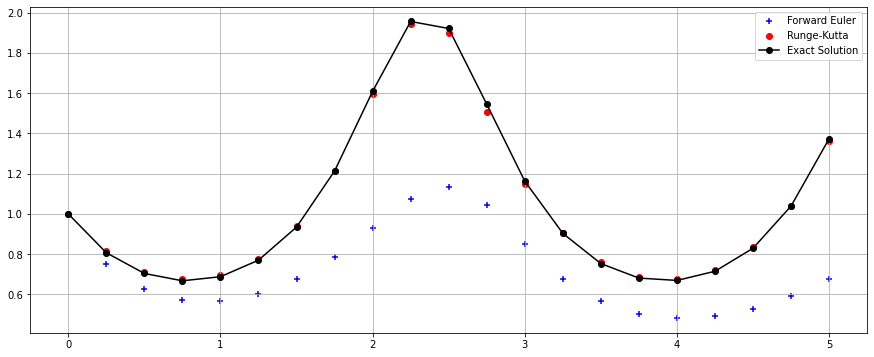

In [23]:
t_init = 0
t_final = 5
y_init = 1
N = 20
step = (t_final - t_init) / N

x_1 = [t_init + i * step for i in range(N + 1)]
y_1 = ForwardEuler(t_init, t_final, N, y_init)
y_2 = RK2(t_init, t_final, N, y_init)
y_exact = [ExactVal(x) for x in x_1]

plt.figure(figsize=(15, 6))
plt.scatter(x_1, y_1, color='blue', marker='+', label='Forward Euler')
plt.scatter(x_1, y_2, color='red', marker='o', label='Runge-Kutta')
plt.plot(x_1, y_exact, color='black', linestyle='-', marker='o', label='Exact Solution')
plt.grid(True)
plt.legend()
plt.show()

Let's look for numerical evidence illustrating the order of Forward Euler and RK2

In [24]:
t_init = 0
t_final = 2
y_init = 1

errors = []
ratios = []
for i in range(10):
    N = 5 * 2**i
    step = (t_final-t_init)/N
    y = ForwardEuler(t_init, t_final, N, y_init)
    y_exact_final = ExactVal(t_final)
    err = abs(y[-1] - y_exact_final)
    errors.append(err)

for i in range(1, len(errors)):
    ratio = errors[i] / errors[i-1]
    ratios.append(ratio)

print(errors)
print(ratios)

[0.8986703963259326, 0.5887899140900021, 0.3621136464386141, 0.20734990762308736, 0.11230551227859276, 0.05867404656731012, 0.03002268224195448, 0.01519044431239136, 0.007641013324948265, 0.0038320849872590657]
[0.6551789360116609, 0.6150133311951766, 0.5726100346186139, 0.5416231604150862, 0.5224502820641542, 0.511685898594242, 0.5059655959441172, 0.5030144719806011, 0.5015152865585418]


Since the ratios approach 0.5 as the step sizes decrease, and since the ratio $\approx 1/2^p$, then we can conclude that $p = 1$ which implies the order for the Forward Euler method is $O(h^p) = O(h)$ 

In [25]:
t_init = 0
t_final = 2
y_init = 1

errors = []
ratios = []
for i in range(10):
    N = 5 * 2**i
    step = (t_final-t_init)/N
    y = RK2(t_init, t_final, N, y_init)
    y_exact_final = ExactVal(t_final)
    err = abs(y[-1] - y_exact_final)
    errors.append(err)

for i in range(1, len(errors)):
    ratio = errors[i] / errors[i-1]
    ratios.append(ratio)

print(errors)
print(ratios)

[0.015373530158845572, 0.009401504428640406, 0.0034565675204452084, 0.001014143008488011, 0.0002723311924484051, 7.04087756735472e-05, 1.789057729495447e-05, 4.508515300205573e-06, 1.1316006587325234e-06, 2.8345838987142713e-07]
[0.6115384255600526, 0.3676611064411399, 0.2933959780879352, 0.26853332337657637, 0.25854098842124595, 0.25409584421556725, 0.2520050206248556, 0.2509918639248992, 0.25049330581772683]


Similar to before, since the ratios approach 0.25, then we can conclude that $p = 2$ and the order for RK2 is $O(h^2)$